In [1]:
import pandas as pd
from scipy.stats import ttest_ind
from scipy.stats import shapiro

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 



In [2]:
# Данные из модуля по мидиям, данные разной длинны - добавляем None:
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105, None]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]

### Задание 1 <br>
Данные объединены в DataFrame - 5 баллов

In [3]:
mussels_df = pd.DataFrame({
    'petersburg': petersburg,
    'magadan': magadan
})

In [4]:
mussels_df.head(3)

,petersburg,magadan
0,0.0974,0.1033
1,0.1352,0.0915
2,0.0817,0.0781


In [5]:
# заменим известное нам пустое значение медианным показателем
mussels_df = mussels_df.fillna(mussels_df['petersburg'].median())

### Задание 2 <br>
Проведён тест на корреляцию - 5 баллов

<Axes: xlabel='magadan', ylabel='petersburg'>

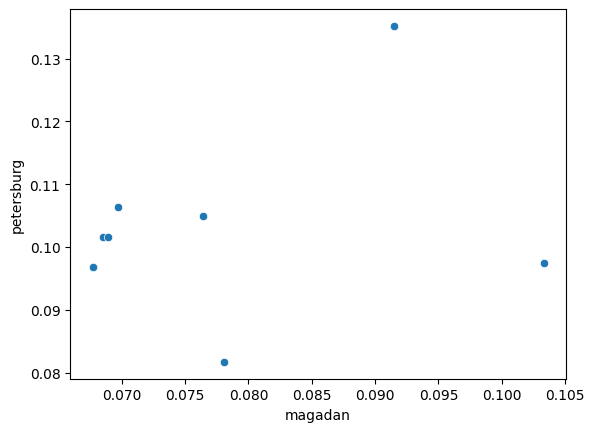

In [6]:
# для начала посмотрим на графическое представление
sns.scatterplot(data=mussels_df, x='magadan', y='petersburg')

Вывод: Судя по графику корреляция будет незначительной

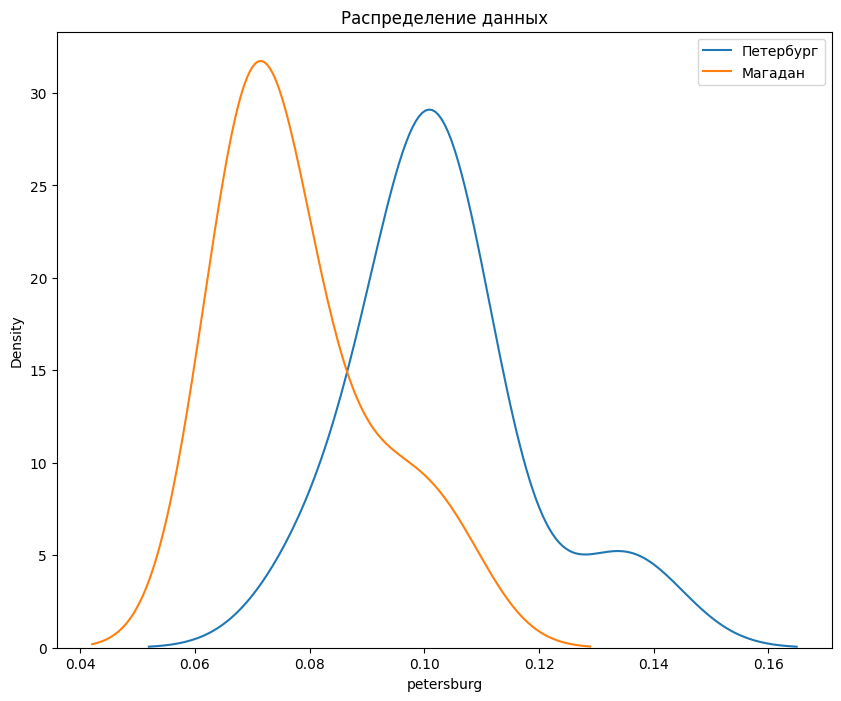

In [7]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределение данных')

sns.kdeplot(mussels_df['petersburg'], ax=ax1, label ='Петербург')
sns.kdeplot(mussels_df['magadan'], ax=ax1, label ='Магадан')

plt.legend()

In [8]:
mussels_corr = mussels_df[['petersburg', 'magadan']].corr()['petersburg'][1]
print('Расчет показателя корреляции Пирсона составляет: {0:.3f}'.format(mussels_corr))

Расчет показателя корреляции Пирсона составляет: 0.257


Вывод: как и ожидалось (с учетом графиков) кореляция низкая, связь данных очень слабая.

### Задание 3 <br>
Обоснован выбор теста на корреляцию - 7 баллов

Для расчёта уровня корреляции выбрана корреляция Пирсона (она стоит по умолчанию в методе .corr() )

Выбор обусловлен следующими фактами:
1. Опираясь на графики - распределение нормальное, с небольшим смещением в право
2. данные не являются категориальными
3. Опираясь на графики - по графику выбросы отсутствуют

### Задание 4 <br>
Сделан правильный вывод по гипотезе - 3 балла

<span style="color:green"><b>Ответьте на вопрос: Какова разница в среднем размере мидии в зависимости от города-производителя</b></span> <br><br>


Т.к. нас интересует средний размер мидии, тогда :
1. Альтернативная гипотеза: Существует разница между средним размером раковины мидий в Петербурге и Магадане.
2. Нулевая гипотеза: Средний размер раковины мидии в Петербурге и Магадане одинаковый. 

Выбор нулевой гипотезы обусловлено тем, что зависимости должны быть уравнены, т.к. по определению нулевая гипотеза предполагает отсутствие разницы между параметрами или распределениями выборки. Так как нет задачи определить какие раковины меньше, а какие больше, то мы ставим гипотезу по принципу "Двусторонний тест".

Ответим на вопрос и рассчитаем разницу средних величин раковины мидии из Петербурга и Магадана

In [9]:
mussels_delta = abs(mussels_df['petersburg'].mean() - mussels_df['magadan'].mean())
print('Разница между средним размером равокины мидии из Петербурга и Магадана составляет: {0:.3f}'.format(mussels_delta))

Разница между средним размером равокины мидии из Петербурга и Магадана составляет: 0.025


### Задание 5 <br>
Проведён тест на сравнение выборок - 7 баллов

In [12]:
# устанавливаем основные параметры, в том числе стандартный размер alpha

H0 = 'Средний размер раковины мидии в Петербурге и Магадане одинаковый'
Ha = 'Существует разница между средним размером раковины мидий в Петербурге и Магадане'

alpha = 0.05

In [13]:
def t_test(df):
    print('\n' + "*** Результаты независимого T-теста ***")
    test_results = ttest_ind(df['petersburg'], df['magadan'], equal_var=True)

    p = round(test_results[1],2)

    if p>alpha:
        print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
    else:
        print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

t_test(mussels_df)


*** Результаты независимого T-теста ***
0.0 <= 0.05. Мы отвергаем нулевую гипотезу. Существует разница между средним размером раковины мидий в Петербурге и Магадане


### Задание 6 <br>
Обоснован выбор теста на сравнение - 7 баллов

Выбор теста обусловлен следующим алгоритмом:

<left> <img src = https://lms.skillfactory.ru/assets/courseware/v1/69e3bc927ae293c1ad78ad4c1fe30ed4/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst-eda-4-10.png alt="drawing" style="width:800px;">

а именно:

In [14]:
_, p = shapiro(mussels_df)
print(('Данные не распределены нормально', 'Данные распределены нормально')[p > alpha])

Данные распределены нормально


<style>
  p {
  font-family: Verdana, Arial, Helvetica, sans-serif; 
  font-size: 10pt; /* Размер шрифта в пунктах */ 
  }
</style>

1.Как видим выше данне распределены нормально<br>
2.Тип количественный (не категориальный)<br>
3.В сравнении 2 группы<br>
4.Объектов в выборке менее 30

Следовательно оптимальный инструмент - Т-тест

### Задание 7 <br>
Сделан правильный вывод по гипотезе - 3 балла

Выводы: 
1. Согласно произведенных расчётов, низкий уровень корреляции указывает на отсутствие взаимосвязи между размером раковины мидий в Санкт-Петербурге и Магадане;
2. Мы подтвердили гипотезу, что существует разница между средним размером раковины мидий в Петербурге и Магадане;
3. Гипотеза является истинной т.к. **P-value** (вероятность обнаружения наблюдаемых результатов, когда нулевая гипотеза ($H_0$) верна.) соответствует нулю.
